<a href="https://colab.research.google.com/github/sayanbanerjee32/lang_detect/blob/main/Data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount gdrive for data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# file locations
tar_file_loc = '/content/drive/MyDrive/lang_detection/data/sentences.tar.bz2'
dest_loc = '/tmp'
file_name = 'sentences.csv'
data_save_path = '/content/drive/MyDrive/lang_detection/models/'

In [3]:
import pandas as pd
import tarfile
import numpy as np
from sklearn.model_selection import StratifiedKFold

In [4]:
# extract tar file
tar = tarfile.open(tar_file_loc, "r:bz2")  
tar.extractall(path = dest_loc)
tar.close()

In [5]:
# read lines to understand structure
with open(dest_loc +'/' + file_name) as file:
    lines = file.readlines()
    lines = [line.strip() for line in lines]

In [6]:
# see few samples
lines[0:10]

['1\tcmn\t我們試試看！',
 '2\tcmn\t我该去睡觉了。',
 '3\tcmn\t你在干什麼啊？',
 '4\tcmn\t這是什麼啊？',
 '5\tcmn\t今天是６月１８号，也是Muiriel的生日！',
 '6\tcmn\t生日快乐，Muiriel！',
 '7\tcmn\tMuiriel现在20岁了。',
 '8\tcmn\t密码是"Muiriel"。',
 '9\tcmn\t我很快就會回來。',
 '10\tcmn\t我不知道。']

In [7]:
# read data in pandas
sent_df = pd.read_csv(dest_loc +'/' + file_name, sep = '\t', names = ['id','label','text'])
sent_df.head()

,id,label,text
0,1,cmn,我們試試看！
1,2,cmn,我该去睡觉了。
2,3,cmn,你在干什麼啊？
3,4,cmn,這是什麼啊？
4,5,cmn,今天是６月１８号，也是Muiriel的生日！


In [8]:
# number of total observations
sent_df.shape

(9887134, 3)

In [9]:
# is there blank label
sent_df['label'].fillna('unk',inplace  = True)
sent_df.loc[sent_df['label'] == 'unk',:]

,id,label,text
387366,404564,unk,Lèu gāi dịdiang?
387368,404566,unk,Kuăilāk sí mitgāi?
387372,404570,unk,Dó Hānggok nạng dăn mitgāi uẹ?
388306,405522,unk,Lèu kiá dịgŏ?
388307,405523,unk,Lèu miān mitgāi?
388308,405524,unk,Uà sí Diōjiunāng.
4655179,4962310,unk,厝漏閣抵著透暝雨。
5786464,6142175,unk,我昨暗睏十一點鐘久。
5786465,6142176,unk,阮阿叔有去過芬蘭。
5786466,6142177,unk,阮佇厝裡攏講台語。


In [10]:
# num observations without label
sent_df.loc[sent_df['label'] == 'unk',:].shape

(15, 3)

In [ ]:
# is there blank texts
sent_df.loc[sent_df['text'].isnull(),:].shape, sent_df.loc[sent_df['text'] == '',:].shape

((0, 3), (0, 3))

In [ ]:
# remove records where label not known
sent_df = sent_df.loc[sent_df['label'] != 'unk',:]
len(sent_df['label'].unique())

402

In [ ]:
# create test split
def get_train_test_split(df):
    train_ids, test_ids = next(StratifiedKFold(n_splits=5,random_state=1).split(df.id, df.label))
    print(f"Test: {len(test_ids)}, Train: {len(train_ids)}, Total: {len(df)}")
    dummy = [False] * len(df)
    com_list = dummy[:]
    for index in test_ids: com_list[index] = True
    return com_list

In [ ]:
train_test_bool = get_train_test_split(sent_df)
sum(train_test_bool)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Test: 1977424, Train: 7909695, Total: 9887119


1977424

In [ ]:
# keep test separate
test_df = sent_df.loc[train_test_bool,:]
test_df.shape

(1977424, 3)

In [ ]:
# Training df
train_df = sent_df.loc[list(~np.array(train_test_bool)),:]
train_df.shape

(7909695, 3)

In [ ]:
# is validation identified
train_df['is_valid'] = get_train_test_split(train_df)
train_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Test: 1581939, Train: 6327756, Total: 7909695


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,label,text,is_valid
111285,116355,jpn,彼の発言で私の希望は失われた。,True
111286,116356,jpn,彼の発言が舌戦の火蓋を切った。,True
111287,116357,jpn,彼の発言がゴタゴタを起こした。,True
111288,116358,jpn,彼の発言が舌戦の火蓋をきったことになった。,True
111289,116359,jpn,彼の発見は輸送における革命をもたらした。,True


(7909695, 7863171, 400)

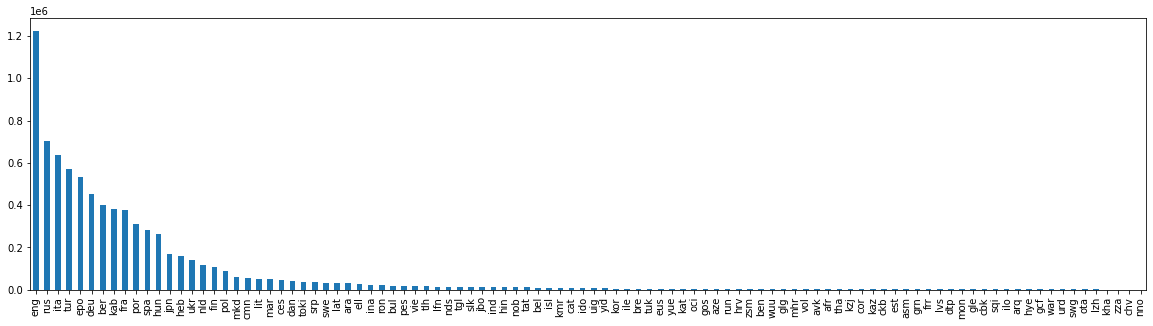

In [ ]:
# create a subsample
cound_df = train_df['label'].value_counts()
sample_labels = cound_df[:100].index.tolist()

train_csv_sample = train_df.loc[train_df['label'].isin(sample_labels),:]
train_csv_sample['label'].value_counts().plot.bar(figsize = [20,5])
len(train_df), len(train_csv_sample), len(train_df['label'].unique())

In [ ]:
# to get an idea how many observations should be kept to deal with the large volume
train_csv_sample['label'].value_counts().median()

6261.5

(7909695, 46524, 300)

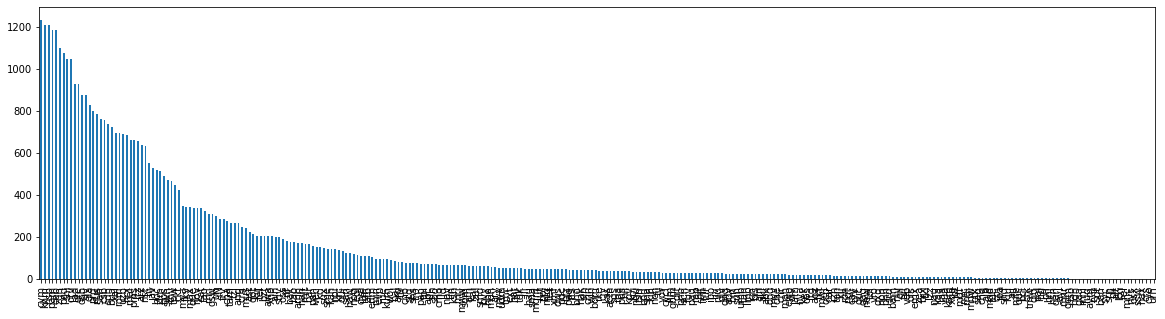

In [ ]:
# see less frequent languages
infreq_lang = cound_df[100:].index.tolist()
train_infreq_sample = train_df.loc[train_df['label'].isin(infreq_lang),:]
train_infreq_sample['label'].value_counts().plot.bar(figsize = [20,5])
len(train_df), len(train_infreq_sample), len(train_infreq_sample['label'].unique())

In [ ]:
# distribution of languages
cound_df.describe()

count    4.000000e+02
mean     1.977424e+04
std      9.872701e+04
min      1.000000e+00
25%      2.200000e+01
50%      7.650000e+01
75%      1.239500e+03
max      1.223235e+06
Name: label, dtype: float64

In [ ]:
# consider all languages more than or equal to 500 observations
grt500_obs = cound_df[cound_df >= 500].index.tolist()
len(grt500_obs)

133

(7909695, 7890587, 400, 133)

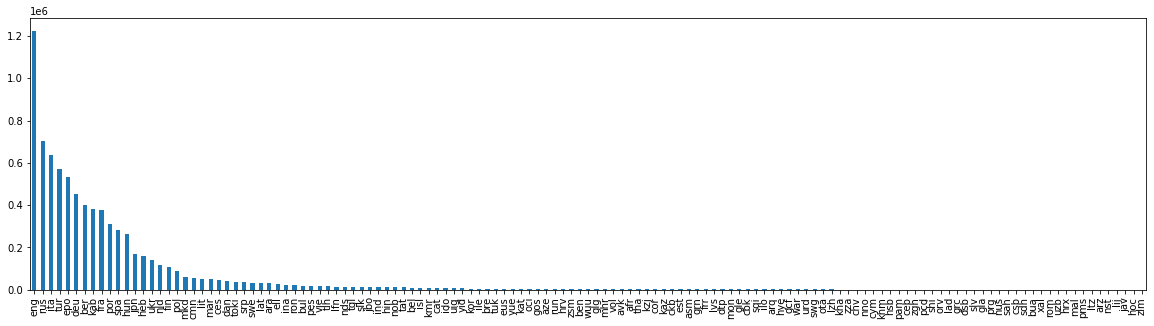

In [ ]:
train_csv_500obs = train_df.loc[train_df['label'].isin(grt500_obs),:]
train_csv_500obs['label'].value_counts().plot.bar(figsize = [20,5])
len(train_df), len(train_csv_500obs), len(train_df['label'].unique()), len(train_csv_500obs['label'].unique())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(count    7.890587e+06
 mean     3.532629e+01
 std      5.577729e+01
 min      1.000000e+00
 25%      2.300000e+01
 50%      3.100000e+01
 75%      4.100000e+01
 max      5.642300e+04
 Name: num_chars, dtype: float64,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7b204ab4d0>)

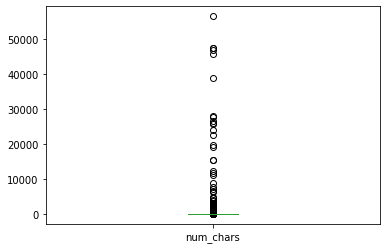

In [ ]:
# text length - num characters
train_csv_500obs['num_chars'] = train_csv_500obs['text'].apply(lambda x: len(list(x)))
train_csv_500obs['num_chars'].describe(), train_csv_500obs['num_chars'].plot.box()

In [ ]:
# reduce outliers in terms of number of characters
max_length = 256
num_obs_trunc = train_csv_500obs.loc[train_csv_500obs.num_chars > max_length,:].shape[0]
num_obs_trunc, (num_obs_trunc/train_csv_500obs.shape[0]) * 100

(8758, 0.11099300977227677)

In [ ]:
grt500_obs.sort()
grt500_obs[:10]

['afr', 'ara', 'arq', 'arz', 'asm', 'avk', 'aze', 'bel', 'ben', 'ber']

In [ ]:
# Save the list of 133 languages for model building and inference
from sklearn.externals import joblib
joblib.dump(grt500_obs, data_save_path + 'supported_languages.pkl')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['/content/drive/MyDrive/lang_detection/models/supported_languages.pkl']